# Import libraries and dataset

In [704]:
#import libraries
import numpy as np
import pandas as pd 
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [721]:
#import dataset
df = pd.read_csv (r'C:\Users\NEHA\Desktop\MPS\ALY 6020\M1\adult-all.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

       39         State-gov   77516  Bachelors  13       Never-married  \
0      50  Self-emp-not-inc   83311  Bachelors  13  Married-civ-spouse   
1      38           Private  215646    HS-grad   9            Divorced   
2      53           Private  234721       11th   7  Married-civ-spouse   
3      28           Private  338409  Bachelors  13  Married-civ-spouse   
4      37           Private  284582    Masters  14  Married-civ-spouse   
...    ..               ...     ...        ...  ..                 ...   
48836  39           Private  215419  Bachelors  13            Divorced   
48837  64                 ?  321403    HS-grad   9             Widowed   
48838  38           Private  374983  Bachelors  13  Married-civ-spouse   
48839  44           Private   83891  Bachelors  13            Divorced   
48840  35      Self-emp-inc  182148  Bachelors  13  Married-civ-spouse   

            Adm-clerical   Not-in-family               White    Male  2174  0  \
0        Exec-managerial      

In [332]:
print(df.shape)

(48841, 15)


In [706]:
df.columns.values

array(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0',
       '40', 'United-States', '<=50K'], dtype=object)

In [722]:
#Add column names
df.columns = ["age", "workclass","fnlwgt","education","education_no","marital_status","occupation","relationship","race","sex","capital_gain",
              "capital_loss","hours_per_week","native_country","income"]
print(df.head())


   age         workclass  fnlwgt  education  education_no      marital_status  \
0   50  Self-emp-not-inc   83311  Bachelors            13  Married-civ-spouse   
1   38           Private  215646    HS-grad             9            Divorced   
2   53           Private  234721       11th             7  Married-civ-spouse   
3   28           Private  338409  Bachelors            13  Married-civ-spouse   
4   37           Private  284582    Masters            14  Married-civ-spouse   

          occupation   relationship   race     sex  capital_gain  \
0    Exec-managerial        Husband  White    Male             0   
1  Handlers-cleaners  Not-in-family  White    Male             0   
2  Handlers-cleaners        Husband  Black    Male             0   
3     Prof-specialty           Wife  Black  Female             0   
4    Exec-managerial           Wife  White  Female             0   

   capital_loss  hours_per_week native_country income  
0             0              13  United-States  

# Data Cleaning

In [723]:
##Checking the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_no      0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [724]:
# Check for '?' in dataset
df.isin(['?']).sum() 

age                  0
workclass         2799
fnlwgt               0
education            0
education_no         0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [725]:
# percentage for "?" in dataset
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.73 %
fnlwgt             0.0 %
education          0.0 %
education_no       0.0 %
marital_status     0.0 %
occupation        5.75 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country    1.75 %
income             0.0 %
dtype: object

In [726]:
# replace ? with na
df = df.replace('?', np.nan)

In [727]:
# replace na with mode
df['workclass'].fillna(df.workclass.mode(), inplace=True)
df['occupation'].fillna(df.occupation.mode(), inplace=True)
df['native_country'].fillna(df.native_country.mode(), inplace=True)

In [728]:
# check "?" in dataset again
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_no      0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
income            0.0 %
dtype: object

# Descriptive Analysis

In [482]:
# Statistical summary of numeric variables
round(df.describe(),2)

,age,fnlwgt,education_no,capital_gain,capital_loss,hours_per_week
count,48841.00,48841.00,48841.00,48841.00,48841.00,48841.00
mean,38.64,189666.43,10.08,1079.05,87.50,40.42
std,13.71,105603.89,2.57,7452.09,403.01,12.39
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117555.00,9.00,0.00,0.00,40.00
50%,37.00,178147.00,10.00,0.00,0.00,40.00
75%,48.00,237646.00,12.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


In [483]:
#Checking info of various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       46042 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education_no    48841 non-null  int64 
 5   marital_status  48841 non-null  object
 6   occupation      46032 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital_gain    48841 non-null  int64 
 11  capital_loss    48841 non-null  int64 
 12  hours_per_week  48841 non-null  int64 
 13  native_country  47984 non-null  object
 14  income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Exploratory Data Analysis
## Univariate Analysis

In [729]:
# Checking the counts of label categories
income = df['income'].value_counts(normalize=True)
print (income)

<=50K   0.76071
>50K    0.23929
Name: income, dtype: float64


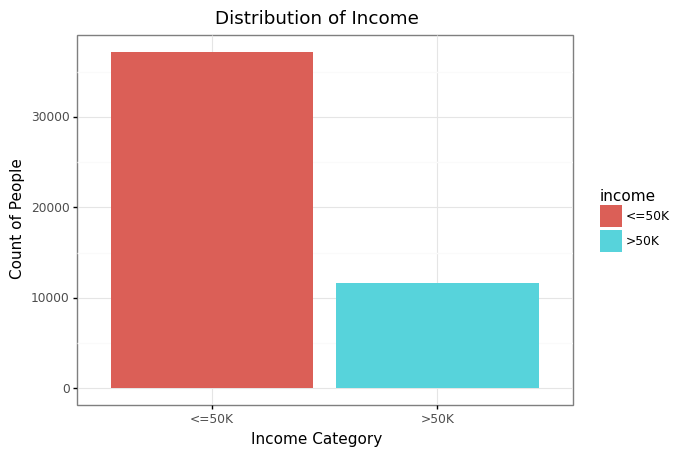

<ggplot: (166850625232)>

In [485]:
###Visualising the target variable for checking distribution
#barplot for income 
ggplot(df)  +\
  geom_bar(aes(x = df.income , fill= "income"))+\
 ggtitle("Distribution of Income") +\
 theme_bw() +\
  ylab("Count of People") + xlab("Income Category")

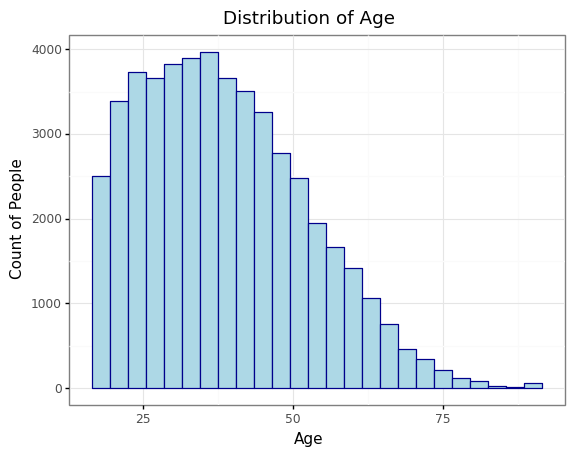

<ggplot: (149901145429)>

In [141]:
ggplot(df)  +\
  geom_histogram(aes(x = df.age), binwidth= 3, fill="lightblue" ,color="darkblue")+\
 ggtitle("Distribution of Age") +\
 theme_bw() +\
  ylab("Count of People") + xlab("Age")


C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


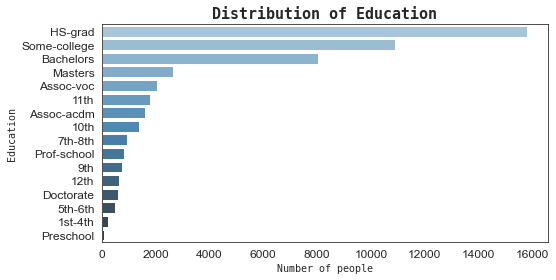

In [405]:
# Creating a barplot for 'Education'
edu = df['education'].value_counts()

plt.figure(figsize=(8, 4))
sns.set_style("white")
sns.barplot(edu.values, edu.index,palette='Blues_d')

plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=12)
plt.show()

C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


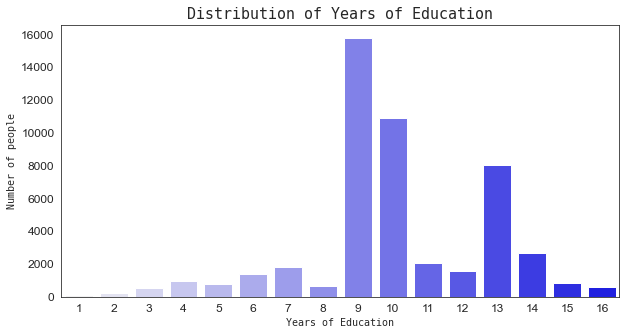

In [392]:
# Creating a barplot for 'Years of Education'
edu_year = df['education_no'].value_counts()

plt.figure(figsize=(10, 5))
sns.set_style("white")
sns.barplot(edu_year.index, edu_year.values, palette='light:b')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=12)
plt.show()

C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


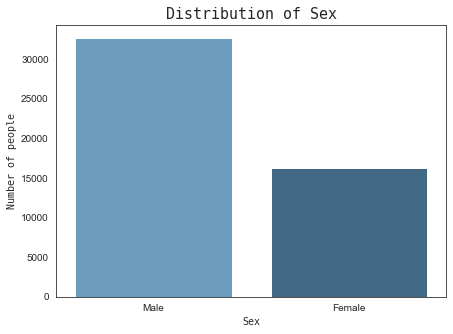

In [401]:
# Creating a barplot for 'Sex'
sex = df['sex'].value_counts()

plt.figure(figsize=(7, 5))
sns.set_style("white")
sns.barplot(sex.index, sex.values,palette='Blues_d')
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=10)
plt.show()

C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


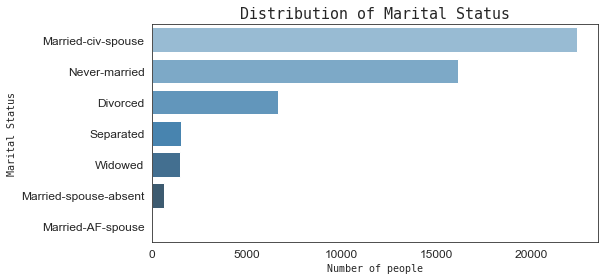

In [404]:
# Creating chart for 'Marital status'
marital = df['marital_status'].value_counts()

#plt.style.use('ggplot')
plt.figure(figsize=(8, 4))
sns.set_style("white")
sns.barplot(marital.values, marital.index, palette='Blues_d')
plt.title('Distribution of Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=12)
plt.show()


C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


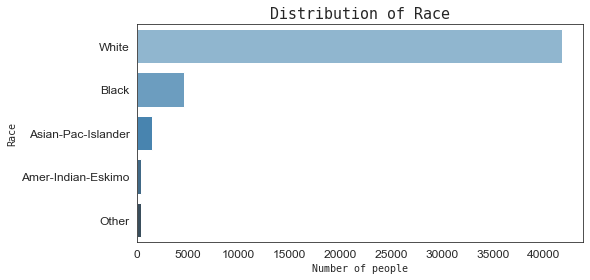

In [403]:
# Creating a chart for Race distribution
race = df['race'].value_counts()

plt.figure(figsize=(8, 4))
sns.set_style("white")
sns.barplot(race.values, race.index, palette='Blues_d')
plt.title('Distribution of Race', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=12)
plt.show()


C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


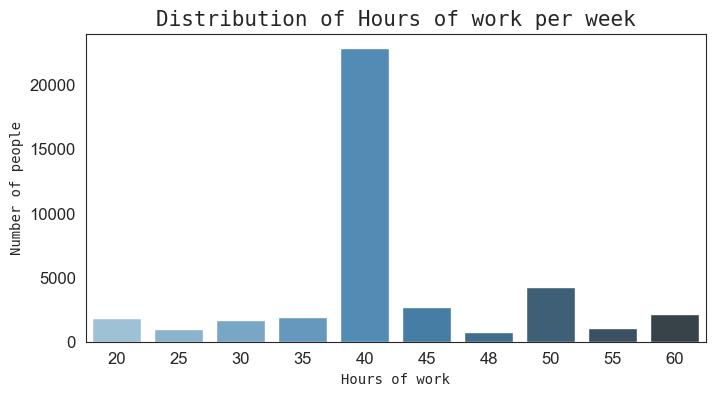

In [418]:
# Creating a barplot for 'Hours per week'
hours = df['hours_per_week'].value_counts().head(10)

plt.figure(figsize=(8, 4))
sns.set_style("white")
sns.barplot(hours.index, hours.values, palette='Blues_d')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=12)
plt.show()

## Bivariate analysis

C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


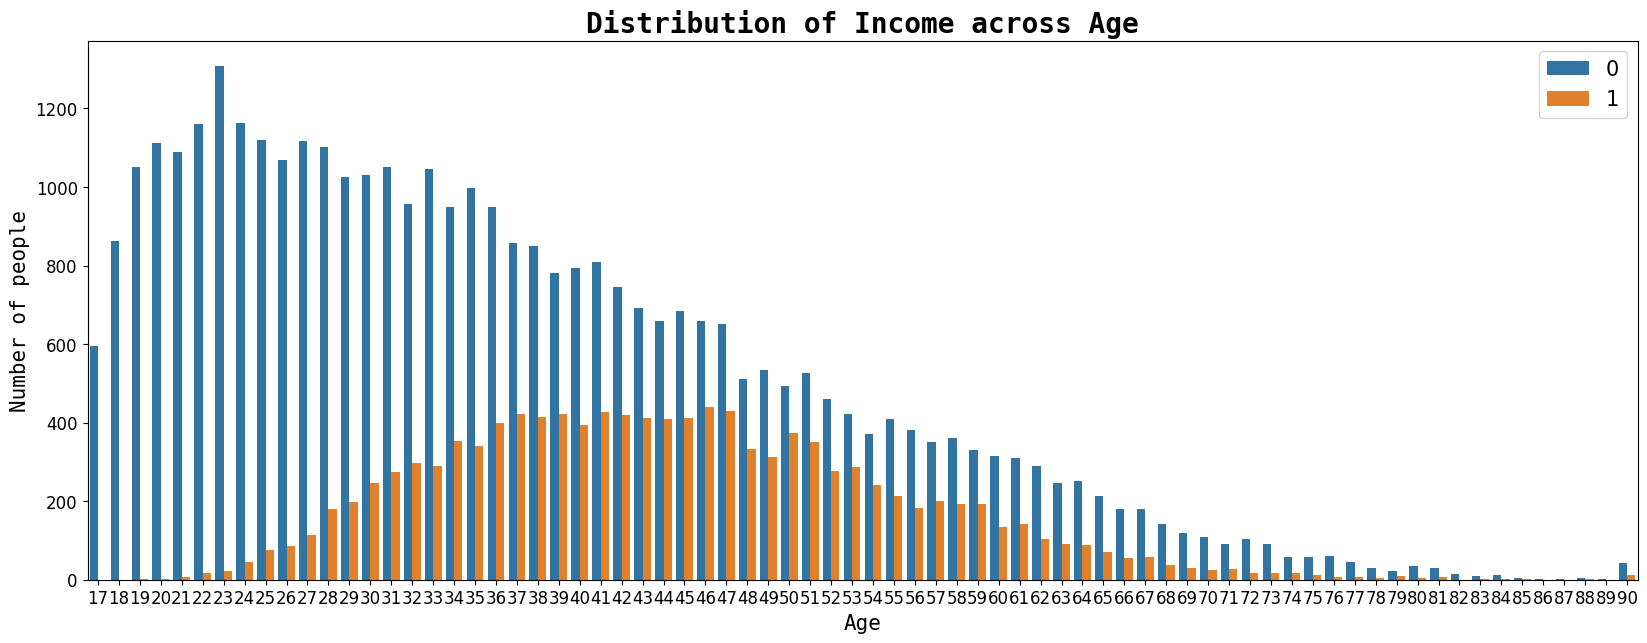

In [686]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df['age'], hue=df['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

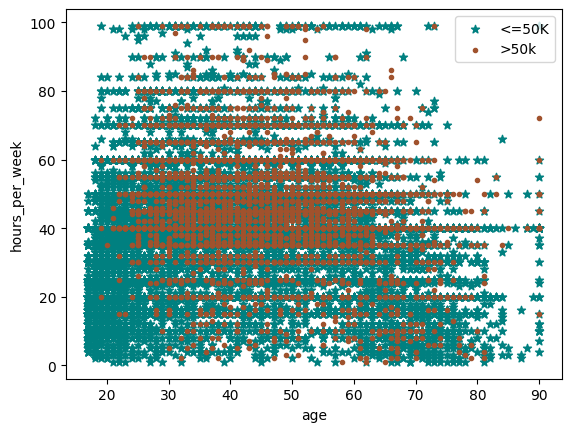

In [688]:
plt.xlabel("age")
plt.ylabel("hours_per_week")
s=plt.scatter(df0['age'],df0['hours_per_week'],color="teal", marker="*")
ver=plt.scatter(df1['age'],df1['hours_per_week'],color="sienna", marker=".")
plt.legend((s,ver),('<=50K', '>50k'))

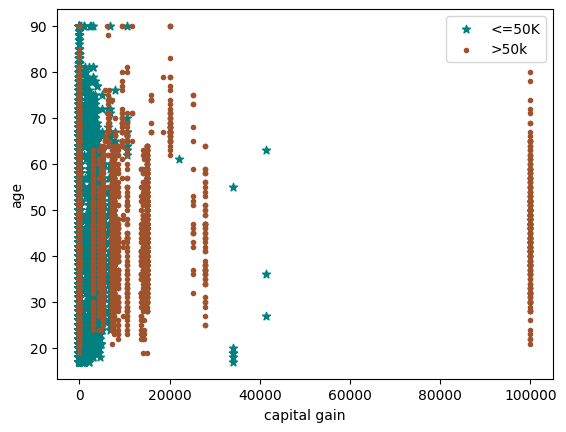

In [696]:
plt.xlabel("capital gain")
plt.ylabel("age")
s=plt.scatter(df0['capital_gain'],df0['age'],color="teal", marker="*")
ver=plt.scatter(df1['capital_gain'],df1['age'],color="sienna", marker=".")
plt.legend((s,ver),('<=50K', '>50k'))

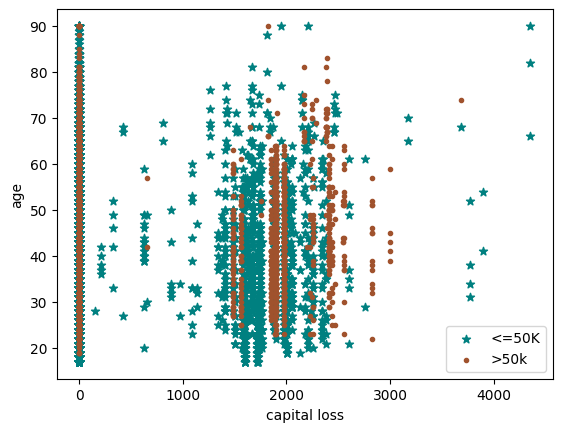

In [697]:
plt.xlabel("capital loss")
plt.ylabel("age")
s=plt.scatter(df0['capital_loss'],df0['age'],color="teal", marker="*")
ver=plt.scatter(df1['capital_loss'],df1['age'],color="sienna", marker=".")
plt.legend((s,ver),('<=50K', '>50k'))

C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


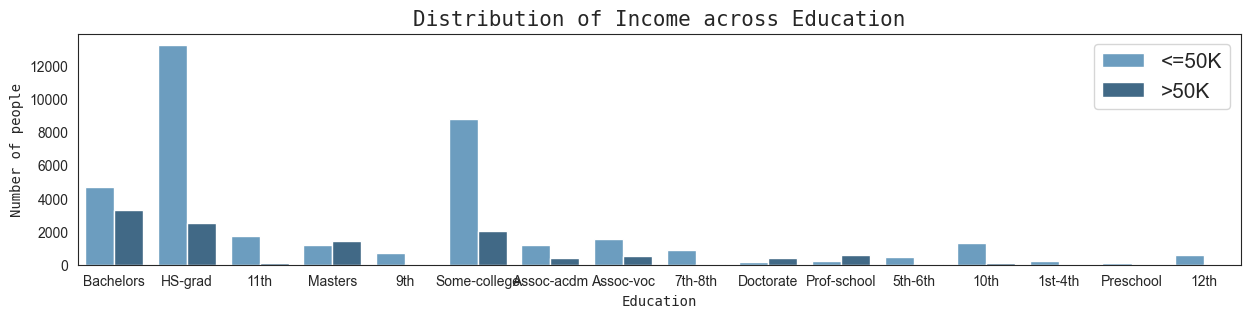

In [450]:
# Creating a countplot of income across education
plt.figure(figsize=(15, 3))
sns.set_style("white")
sns.countplot(df['education'],
              hue=df['income'], palette='Blues_d')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 15})
plt.show()

C:\Users\NEHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


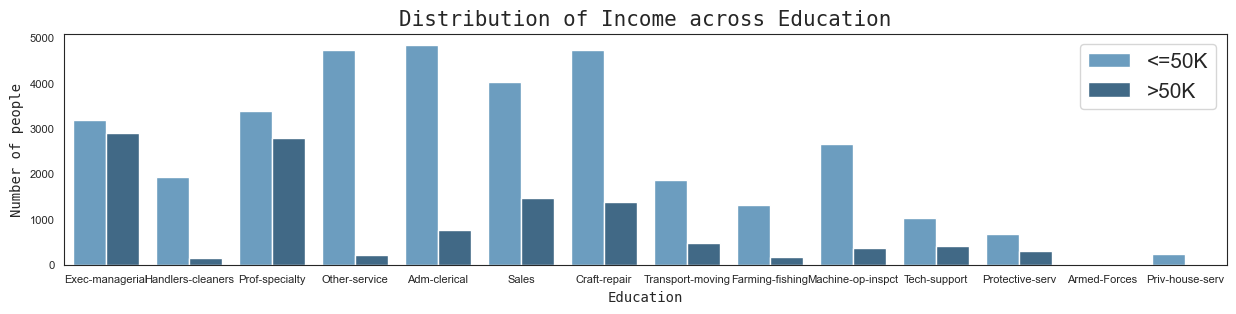

In [469]:
# Creating a countplot of income across education
plt.figure(figsize=(15, 3))
sns.set_style("white")
sns.countplot(df['occupation'],
              hue=df['income'], palette='Blues_d')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=8)
plt.legend(loc=1, prop={'size': 15})
plt.show()

## Multivariate analysis

In [488]:
corr = df.corr()
corr

,age,fnlwgt,education_no,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038737,-0.003703,-0.004371,-0.013520
education_no,0.030940,-0.038737,1.000000,0.125145,0.080978,0.143692
capital_gain,0.077229,-0.003703,0.125145,1.000000,-0.031440,0.082157
capital_loss,0.056944,-0.004371,0.080978,-0.031440,1.000000,0.054467
hours_per_week,0.071558,-0.013520,0.143692,0.082157,0.054467,1.000000


<AxesSubplot:>

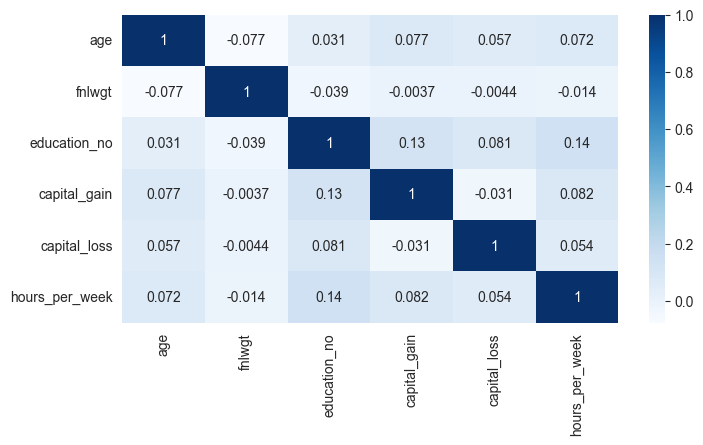

In [491]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True,cmap="Blues")



# Data pre-processing

## Label encoding

In [730]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode "object" type labels in column 
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [731]:
#view encoded data
print(df.head())

   age  workclass  fnlwgt  education  education_no  marital_status  \
0   50          5   83311          9            13               2   
1   38          3  215646         11             9               0   
2   53          3  234721          1             7               2   
3   28          3  338409          9            13               2   
4   37          3  284582         12            14               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   hours_per_week  native_country  income  
0              13              38       0  
1              40              38       0  
2              40         

In [732]:
df0 = df.loc[df['income'] == 0]
df1 = df.loc[df['income'] == 1]
df0.head()
df1.head()

,age,workclass,fnlwgt,education,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
6,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
7,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
8,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1
9,37,3,280464,15,10,2,3,0,2,1,0,0,80,38,1
10,30,6,141297,9,13,2,9,0,1,1,0,0,40,18,1


## Split target and feature

In [733]:
#split column names _ feature
X = df.drop('income', axis=1)
y = df['income']

In [734]:
X.head()

,age,workclass,fnlwgt,education,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38


In [735]:
# view target variables
y.value_counts()

0    37154
1    11687
Name: income, dtype: int64

# Feature Selection

In [736]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variables','Score']  #naming the dataframe columns
print(featureScores.sort_values(by="Score",ascending=False)) # print features in descending order of score


         Variables           Score
10    capital_gain 125015145.37316
11    capital_loss   1973644.78309
2           fnlwgt    115837.57932
0              age     12608.63844
12  hours_per_week      9617.96622
7     relationship      5569.60153
4     education_no      3544.21094
5   marital_status      1679.97495
9              sex       745.95619
3        education       457.07563
1        workclass       137.55475
8             race        47.95641
13  native_country        20.93514
6       occupation         7.48692


In [737]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'occupation', 'native_country'], axis=1)

In [572]:
X.head()

,age,fnlwgt,education_no,marital_status,relationship,capital_gain,capital_loss,hours_per_week
0,50,83311,13,2,0,0,0,13
1,38,215646,9,0,1,0,0,40
2,53,234721,7,2,0,0,0,40
3,28,338409,13,2,5,0,0,40
4,37,284582,14,2,5,0,0,40


## Fixing Imbalanced dataset using over sampling

In [738]:
#View imbalance
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    76.07 %
1    23.93 %
Name: income, dtype: object

In [739]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [740]:
oversample.fit(X, y)

RandomOverSampler(sampling_strategy='minority')

In [741]:
X_resampled, y_resampled = oversample.fit_resample(X, y)

In [742]:
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

# Creating train and test

In [743]:
from sklearn.model_selection import train_test_split

In [744]:
###Splitting the data into train-test set
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,train_size=0.7,test_size=0.3,random_state=100)

In [745]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (52015, 8)
X_test shape: (22293, 8)
y_train shape: (52015,)
y_test shape: (22293,)


# Cross Fold Validation to determine k

In [586]:
# import k-folder
from sklearn.model_selection import cross_val_score


In [647]:
# choose k between 1 to 50
#cross validation
k_range = range(1,50)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

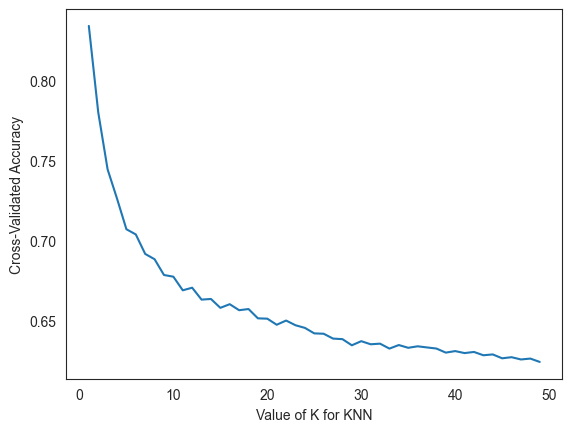

In [648]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [672]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [673]:
knn.score(X_test,y_test)

0.6832189476517292

In [674]:
from sklearn.metrics import confusion_matrix
y_pred =knn.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
cm

array([[7294, 3904],
       [3158, 7937]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

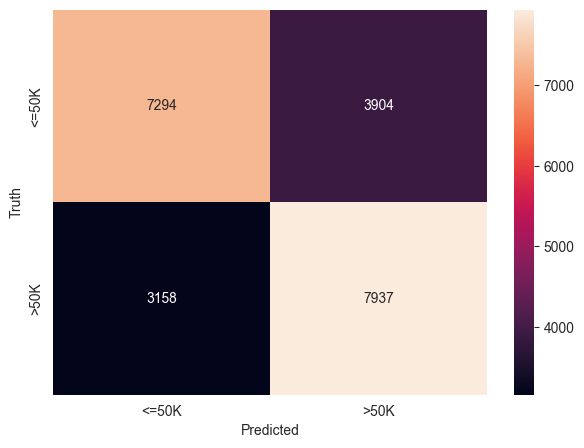

In [675]:
plt.figure(figsize=(7,5))
x_axis_labels=['<=50K', '>50K']
y_axis_labels=['<=50K', '>50K']
sns.heatmap(cm, annot=True,fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [671]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67     11198
           1       0.67      0.72      0.69     11095

    accuracy                           0.68     22293
   macro avg       0.68      0.68      0.68     22293
weighted avg       0.68      0.68      0.68     22293



## Feature scaling

In [746]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [747]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=11)

In [748]:
knn.score(X_test_norm,y_test)

0.8272103350827614

# Model Evaluation

In [749]:
from sklearn.metrics import confusion_matrix
y_pred_norm =knn.predict(X_test_norm)
cm=confusion_matrix(y_test, y_pred_norm)
cm

array([[8845, 2353],
       [1499, 9596]], dtype=int64)

Text(42.0, 0.5, 'Truth')

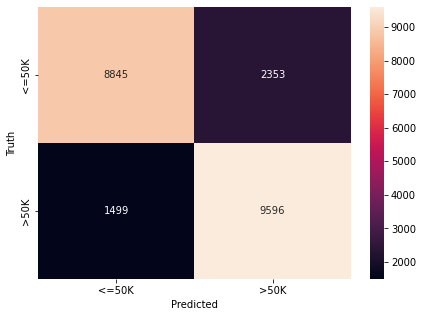

In [750]:
plt.figure(figsize=(7,5))
x_axis_labels=['<=50K', '>50K']
y_axis_labels=['<=50K', '>50K']
sns.heatmap(cm, annot=True,fmt='g',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [751]:
print(classification_report(y_test,y_pred_norm))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82     11198
           1       0.80      0.86      0.83     11095

    accuracy                           0.83     22293
   macro avg       0.83      0.83      0.83     22293
weighted avg       0.83      0.83      0.83     22293



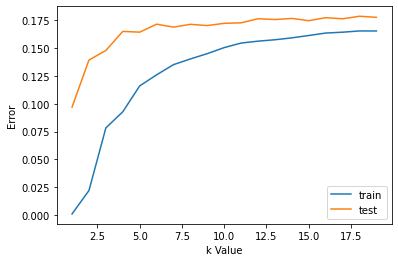

In [752]:
error1= []
error2= []
for k in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_norm,y_train)
    y_pred1= knn.predict(X_train_norm)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test_norm)
    error2.append(np.mean(y_test!= y_pred2))


plt.plot(range(1,20),error1,label="train")
plt.plot(range(1,20),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()